In [20]:
import numpy as np

file = np.load('/home/s.dharia-ra/Shyamal/PEARL_EEG_FINAL_MR/ablation_study_summary_0vs1.npz', allow_pickle=True)
data = dict(file)
data.keys()

all_results = data["all_results"]
all_results 

array([{'feature_types': ['hfd', 'psd', 'csv'], 'sample_f1': 0.5728854115234152, 'sample_roc_auc': np.float64(0.5773219373219373), 'subject_f1': 0.6076923076923078, 'subject_roc_auc': np.float64(0.5723076923076923), 'successful_subjects': 51, 'filename': 'single_run_gradients_and_scores_0vs1.npz'},
       {'feature_types': ['hfd'], 'sample_f1': 0.47889400921658987, 'sample_roc_auc': np.float64(0.4259259259259259), 'subject_f1': 0.4893899204244032, 'subject_roc_auc': np.float64(0.5523872679045093), 'successful_subjects': 55, 'filename': 'single_run_gradients_and_scores_0vs1_hfd.npz'},
       {'feature_types': ['psd'], 'sample_f1': 0.42082921081693564, 'sample_roc_auc': np.float64(0.366195107574418), 'subject_f1': 0.42957510873201743, 'subject_roc_auc': np.float64(0.5848806366047745), 'successful_subjects': 55, 'filename': 'single_run_gradients_and_scores_0vs1_psd.npz'},
       {'feature_types': ['csv'], 'sample_f1': 0.19047619047619047, 'sample_roc_auc': np.float64(0.0030769230769230748

In [8]:
import numpy as np
import glob
# data = np.load("/home/s.dharia-ra/Shyamal/PEARL_EEG_FINAL_MR/permutation_test_results_0vs2.npz", allow_pickle=True)
#there are other files with similar names for other comparisons like 0vs1, 1vs2 etc.
all_files = glob.glob("/home/s.dharia-ra/Shyamal/PEARL_EEG_FINAL_MR/permutation_test_results_*.npz")
print(all_files)

for file in all_files:
    data = np.load(file, allow_pickle=True)
    all_f1 = data["p_value_subject_f1"]
    
    print("-----")
    if file.endswith("0vs2.npz"):
        print("Comparison: N vs A+P+")
    elif file.endswith("0vs1.npz"):
        print("Comparison: N vs A+P-")
    elif file.endswith("1vs2.npz"):
        print("Comparison: A+P- vs A+P+")
  
    print(all_f1)
# all_f1 = data["p_value_subject_f1"]
# all_f1

['/home/s.dharia-ra/Shyamal/PEARL_EEG_FINAL_MR/permutation_test_results_0vs2.npz', '/home/s.dharia-ra/Shyamal/PEARL_EEG_FINAL_MR/permutation_test_results_0vs1.npz', '/home/s.dharia-ra/Shyamal/PEARL_EEG_FINAL_MR/permutation_test_results_1vs2.npz']
-----
Comparison: N vs A+P+
0.000999000999000999
-----
Comparison: N vs A+P-
0.01098901098901099
-----
Comparison: A+P- vs A+P+
0.005994005994005994


array(0.000999)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=False,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))
        
        if len(cf) == 2:
            # For Binary Confusion Matrices: compute metrics for each class.
            # For positive class (class 1)
            precision_pos = cf[1, 1] / (cf[0, 1] + cf[1, 1]) if (cf[0, 1] + cf[1, 1]) > 0 else 0
            recall_pos    = cf[1, 1] / (cf[1, 0] + cf[1, 1]) if (cf[1, 0] + cf[1, 1]) > 0 else 0
            f1_score_pos  = 2 * ((precision_pos * recall_pos) / (precision_pos + recall_pos)) if (precision_pos + recall_pos) > 0 else 0

            # For negative class (class 0)
            precision_neg = cf[0, 0] / (cf[0, 0] + cf[1, 0]) if (cf[0, 0] + cf[1, 0]) > 0 else 0
            recall_neg    = cf[0, 0] / (cf[0, 0] + cf[0, 1]) if (cf[0, 0] + cf[0, 1]) > 0 else 0
            f1_score_neg  = 2 * ((precision_neg * recall_neg) / (precision_neg + recall_neg)) if (precision_neg + recall_neg) > 0 else 0

            # Macro F1: average of the F1 scores for each class
            f1_score_macro = (f1_score_pos + f1_score_neg) / 2

            stats_text = "\n\nAccuracy={:0.3f}\nPrecision (pos)={:0.3f}\nRecall (pos)={:0.3f}\nF1 Score (pos)={:0.3f}\nF1 Score (macro)={:0.3f}".format(
                accuracy, precision_pos, recall_pos, f1_score_pos, f1_score_macro)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        categories = False

    # Use a local context manager to increase font sizes only for this figure.
    with sns.plotting_context("notebook", font_scale=1.5):
        plt.figure(figsize=figsize)
        # Pass annot_kws to increase the annotation font size.
        sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar,
                    xticklabels=categories, yticklabels=categories,
                    annot_kws={"size": 24})
        if xyplotlabels:
            plt.ylabel('True label', fontsize=18)
            plt.xlabel('Predicted label' + stats_text, fontsize=18)
        else:
            plt.xlabel(stats_text, fontsize=18)
    
        if title:
            plt.title(title, fontsize=20)
    
    
    plt.tight_layout()
    plt.show()

# Example usage:
# make_confusion_matrix(confusion_array, title="Confusion Matrix")


Extracting parameters from /home/s.dharia-ra/Shyamal/PEARL/sub-01/eeg/sub-01_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 661519  =      0.000 ...   661.519 secs...


Found 127 sensors.


/tmp/ipykernel_565979/4175354828.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  csv_data = csv_data.groupby('Group', group_keys=False).apply(


Original grad_dict has 44 entries.
After merging duplicates, we have 44 unique subjects in grad_dict.
Subject 1 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject index 1 (key=1.npz, subject_number=1) with 9 samples:
  Gradient shape = torch.Size([9, 256, 13, 48]), preds shape = torch.Size([9])
Subject 1 original heatmap shape: torch.Size([1, 1, 13, 48])
Subject 1 upsampled heatmap shape: torch.Size([127, 48])
Subject 10 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject index 2 (key=10.npz, subject_number=10) with 9 samples:
  Gradient shape = torch.Size([9, 256, 13, 48]), preds shape = torch.Size([9])
Subject 10 skipped due to insufficient correct predictions.
Subject 11 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject index 3 (key=11.npz, subject_number=11) with 9 samples:
  Gradient shape = torch.Size([9, 256, 13, 48]), preds shape = torch.Size([9])
Subject 11 skipped due to insufficient correct predictions.
Subject 13 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject index 

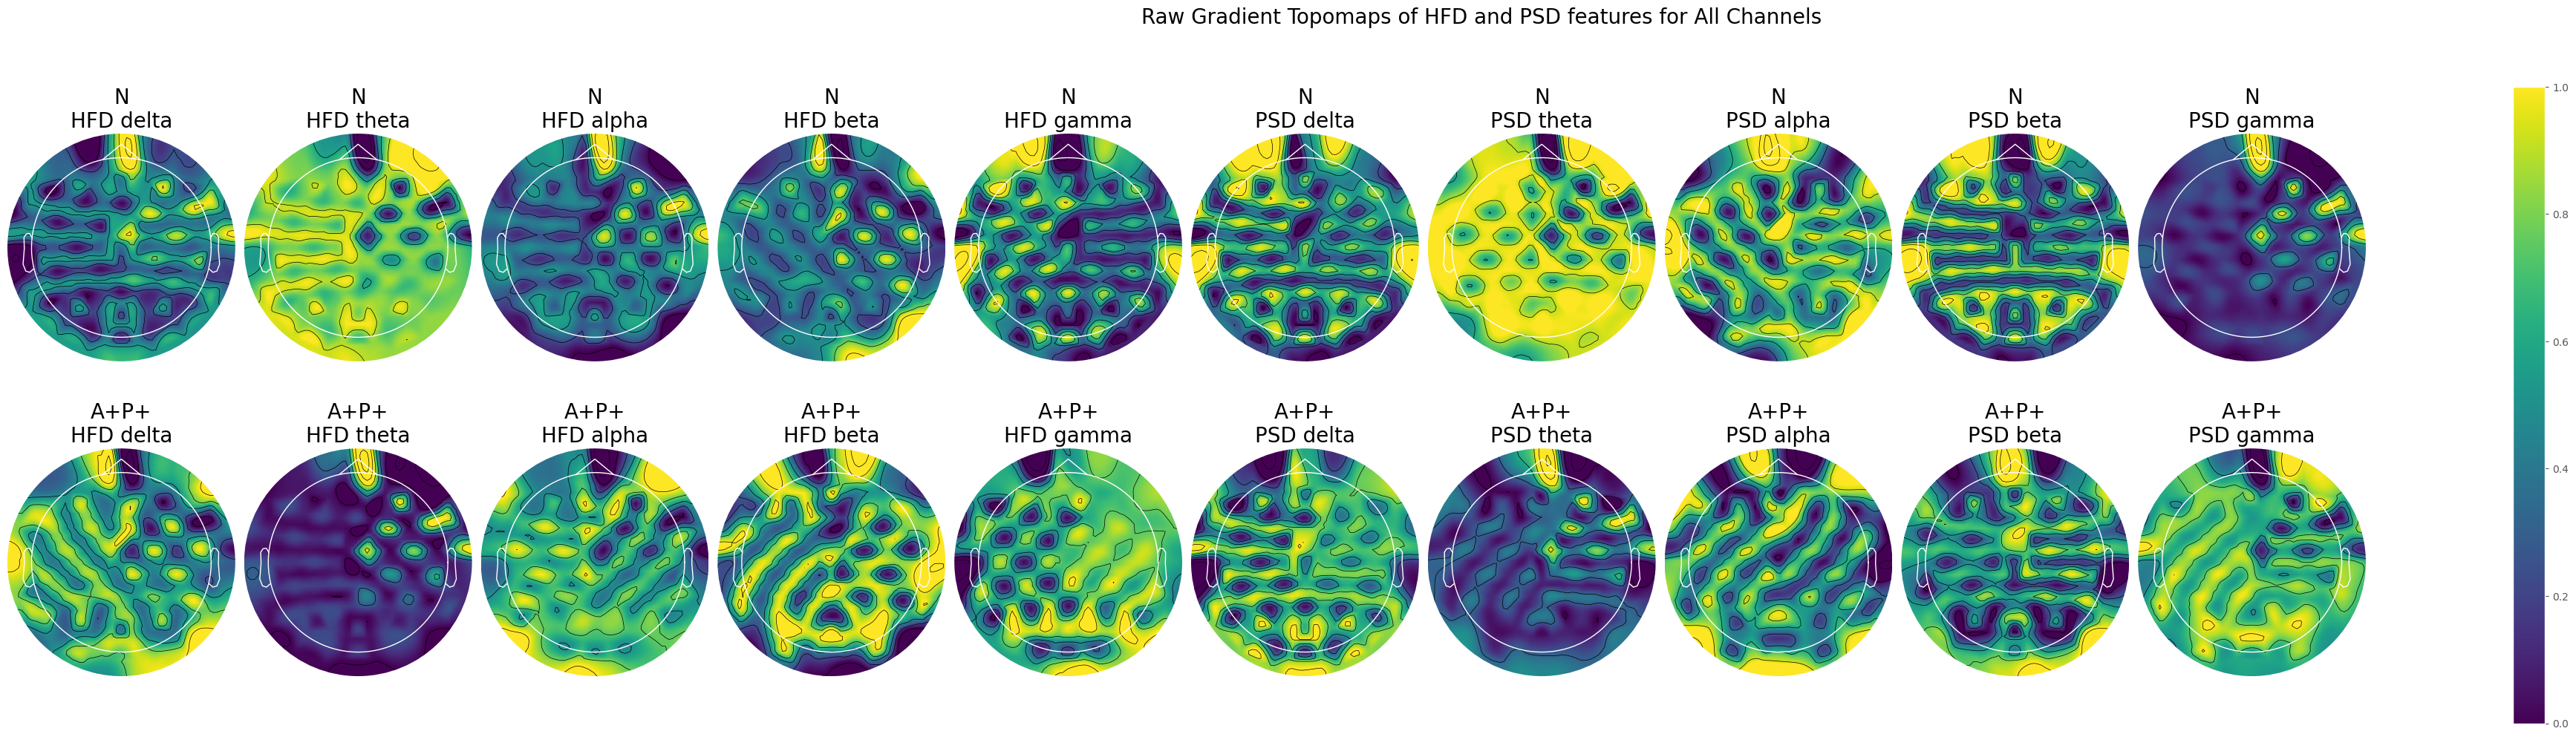

Significant bands found for ('N', 'A+P+'), p < 0.001: [0, 1, 2, 5, 6, 8, 9]


/tmp/ipykernel_565979/4175354828.py:368: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


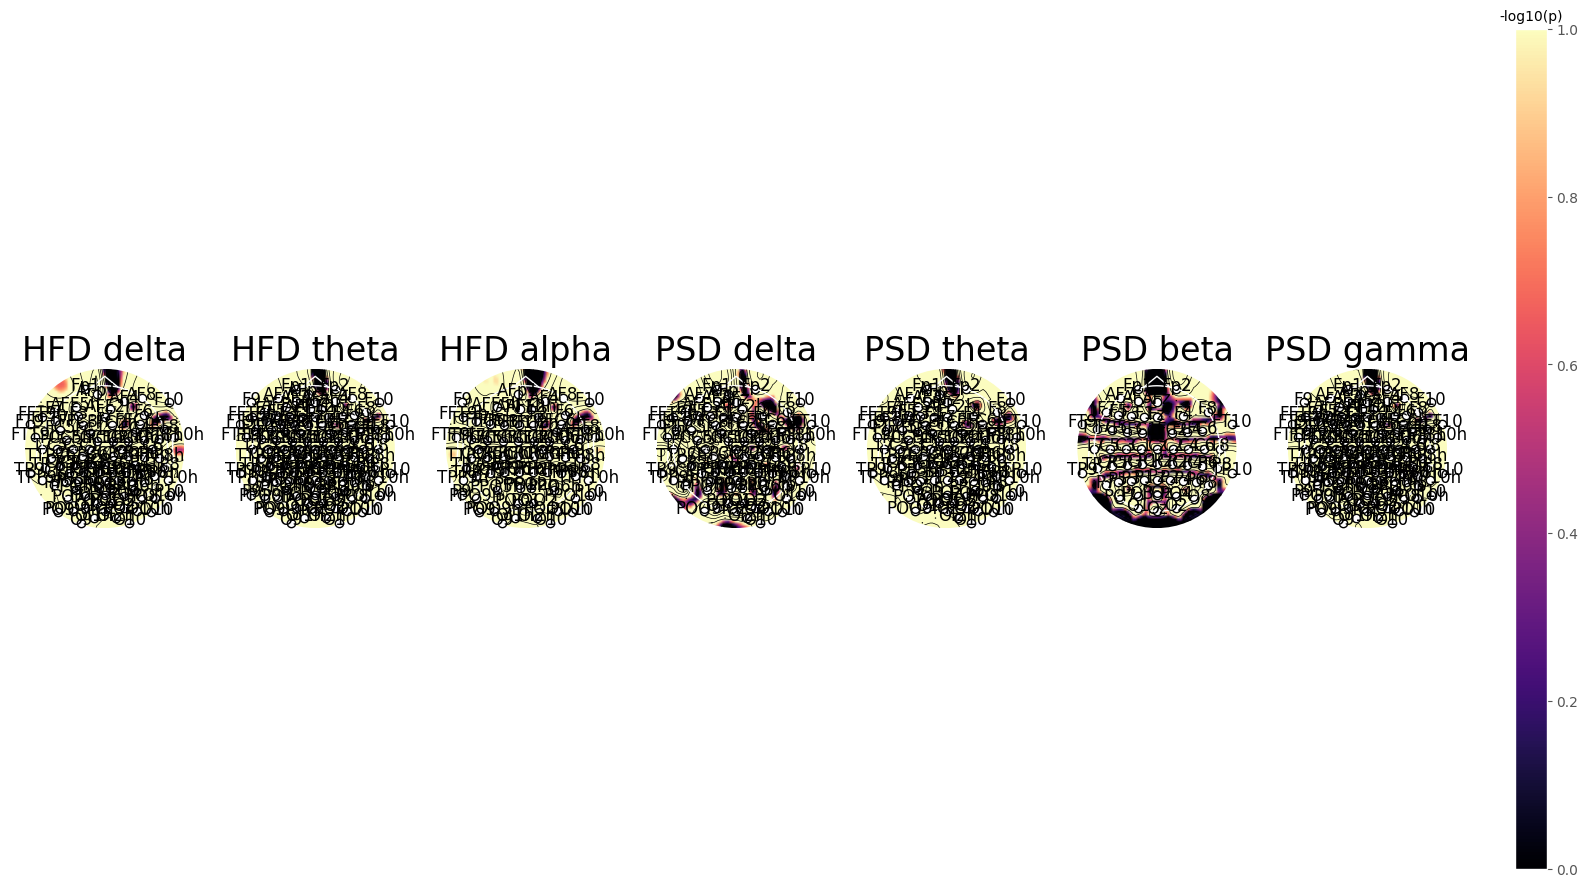

Significant bands found for ('N', 'A+P+'), p < 0.05: [0, 1, 2, 4, 5, 6, 8, 9]


/tmp/ipykernel_565979/4175354828.py:368: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


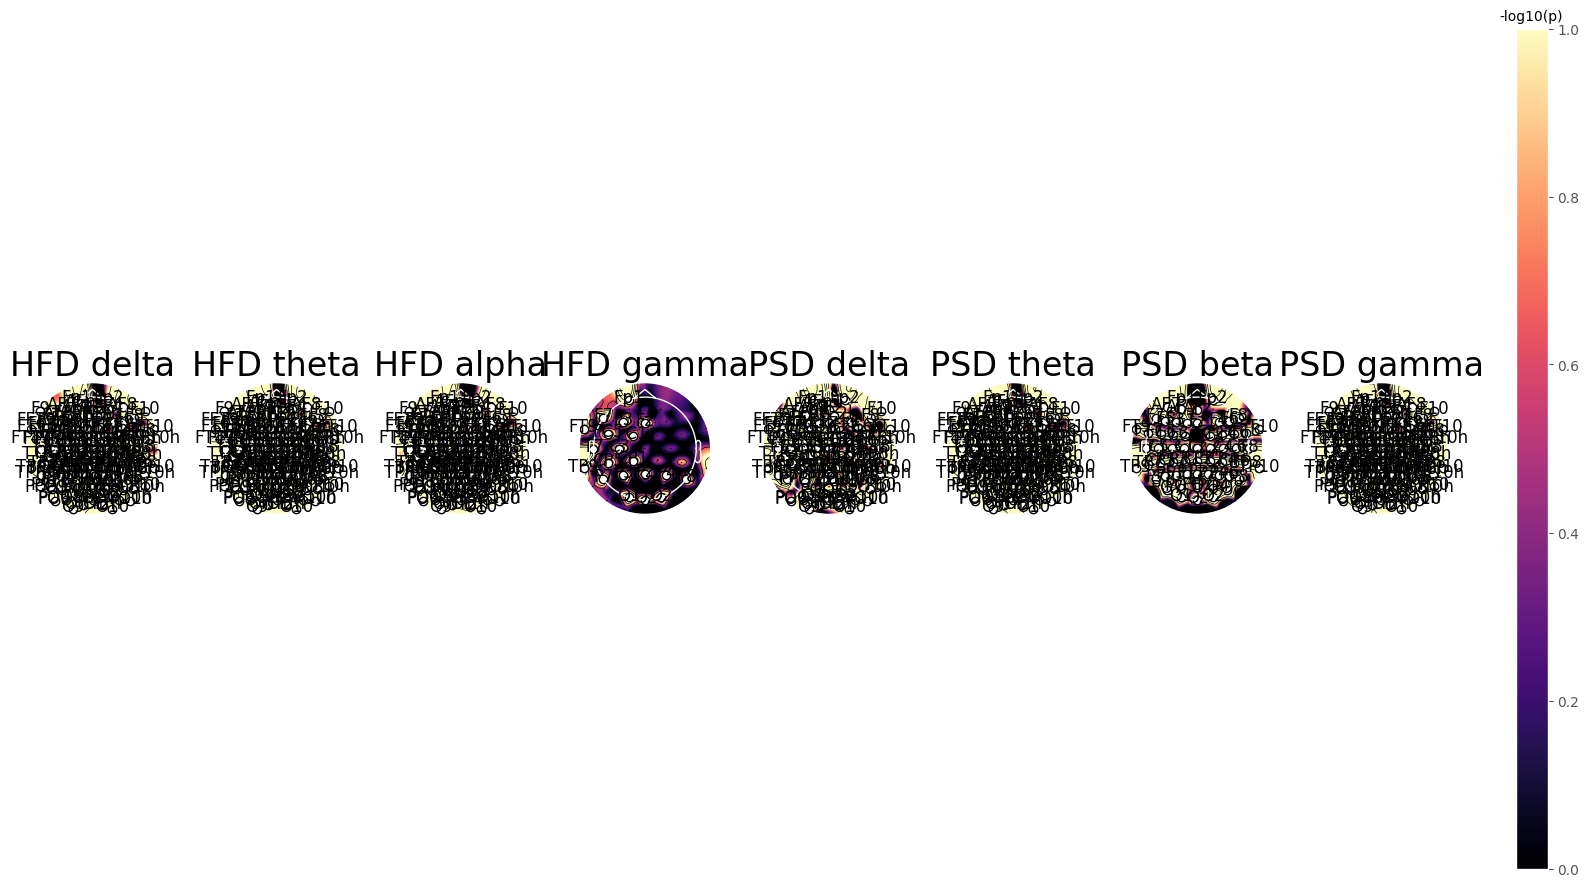

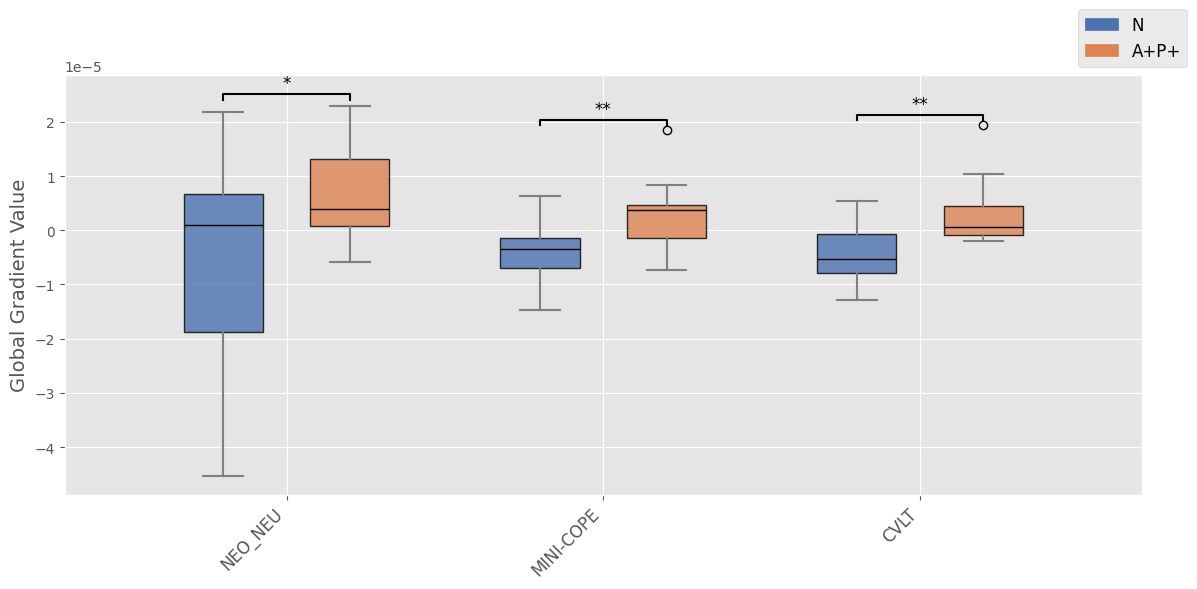

In [6]:
import os
import math
import re
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import mne
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

###############################################################################
# 1) Load raw EEG data (to obtain sensor locations)
###############################################################################
raw_data = mne.io.read_raw_brainvision(
    "/home/s.dharia-ra/Shyamal/PEARL/sub-01/eeg/sub-01_task-rest_eeg.vhdr",
    preload=True
)
channels = raw_data.info['ch_names']  # e.g., 127 channels
n_channels = len(channels)
print(f"Found {n_channels} sensors.")

###############################################################################
# 2) Load participant info and filter by groups
###############################################################################
csv_data = pd.read_csv("filtered_participants.tsv", sep="\t")
filtered_groups = ['N', 'A+P-', 'A+P+']
csv_data = csv_data[csv_data['Group'].isin(filtered_groups)].copy()
group_mapping = {'N': 0, 'A+P-': 1, 'A+P+': 2}
csv_data['Genetic_Risk'] = csv_data['Group'].map(group_mapping)

def get_subject_number(pid):
    try:
        return int(pid.split('-')[1])
    except Exception:
        return None

csv_data['subject_number'] = csv_data['participant_id'].apply(get_subject_number)

# Optionally sample 50 per group if available:
n_sample = 50
csv_data = csv_data.groupby('Group', group_keys=False).apply(
    lambda group: group.sample(n=n_sample, random_state=42) if len(group) >= n_sample else group
).reset_index(drop=True)

###############################################################################
# 3) Load NPZ file with gradients, predictions, and labels
###############################################################################
npz_data = np.load("./final_results_all/single_run_gradients_and_scores_0vs2_final_pool.npz", allow_pickle=True)
# grad_dict = npz_data['avg_subject_cnn_features'].item()  # key -> array shape [9, 256, 13, 48]
grad_dict = npz_data['avg_subject_gradients'].item()  # key -> array shape [9, 256, 13, 48]

preds_array = npz_data['sample_preds']   # shape: (n_subjects, 9)
labels_array = npz_data['sample_labels']   # shape: (n_subjects, 9)
print(f"Original grad_dict has {len(grad_dict)} entries.")

###############################################################################
# 4) Merge duplicates in grad_dict (if keys like "sub-01_run1" exist)
###############################################################################
sub_to_tensors = {}
for k, v in grad_dict.items():
    match = re.search(r"sub-\d+", k)
    real_sub_id = match.group() if match else k
    sub_to_tensors.setdefault(real_sub_id, []).append(v)

final_grad_dict = {}
for sub_id, arr_list in sub_to_tensors.items():
    stack_np = np.stack(arr_list, axis=0)  # shape: [N, 9, 256, 13, 48]
    merged_arr = np.mean(stack_np, axis=0)   # shape: [9, 256, 13, 48]
    final_grad_dict[sub_id] = merged_arr

print(f"After merging duplicates, we have {len(final_grad_dict)} unique subjects in grad_dict.")
grad_dict = final_grad_dict

###############################################################################
# 5) Prepare band indices and define interested (global) columns
###############################################################################
selected_bands = range(10)  # indices 0 to 9 for topomap plotting
selected_bands_names = [
    "HFD delta", "HFD theta", "HFD alpha", "HFD beta", "HFD gamma",
    "PSD delta", "PSD theta", "PSD alpha", "PSD beta", "PSD gamma"
]
# Original list with individual measures (38 columns)
orig_interested_columns = [
    "BDI", "SES", "RPM", "EHI", "NEO_NEU", "NEO_EXT", "NEO_OPE", "NEO_AGR",
    "NEO_CON", "AUDIT", 
    "MINI-COPE_1", "MINI-COPE_2", "MINI-COPE_3", "MINI-COPE_4", "MINI-COPE_5", 
    "MINI-COPE_6", "MINI-COPE_7", "MINI-COPE_8", "MINI-COPE_9", "MINI-COPE_10", 
    "MINI-COPE_11", "MINI-COPE_12", "MINI-COPE_13", "MINI-COPE_14", 
    "CVLT_1", "CVLT_2", "CVLT_3", "CVLT_4", "CVLT_5", "CVLT_6", "CVLT_7", "CVLT_8", 
    "CVLT_9", "CVLT_10", "CVLT_11", "CVLT_12", "CVLT_13", 
    "dementia_history_parents"
]
# For correct family-wise testing, combine MINI-COPE and CVLT columns:
interested_columns = [
    "BDI", "SES", "RPM", "EHI", "NEO_NEU", "NEO_EXT", "NEO_OPE", "NEO_AGR",
    "NEO_CON", "AUDIT", "MINI-COPE", "CVLT", "dementia_history_parents"
]

###############################################################################
# 6) Process each subject’s gradients (using correctly predicted windows only)
###############################################################################
subject_gradient_data = []
subject_global_data   = []
n_samples_per_subject = 9
pred_idx = 0  # used to slice preds_array and labels_array

grad_keys = list(grad_dict.keys())
grad_values = list(grad_dict.values())

for i, key in enumerate(grad_keys):
    # Each subject's gradient array is expected to be [9, 256, 13, 48]
    subject_np = grad_values[i]
    subject_grad_tensor = torch.tensor(subject_np, dtype=torch.float32)
    
    # Extract subject number from key (e.g., "sub-15" or "15.npz" -> 15)
    match = re.search(r"\d+", key)
    subj_num = int(match.group()) if match else i + 1

    # Get predictions & labels for this subject
    chunk_preds = preds_array[pred_idx : pred_idx + n_samples_per_subject]
    chunk_labels = labels_array[pred_idx : pred_idx + n_samples_per_subject]
    print(f"Subject {subj_num} predictions: {chunk_labels}")
    pred_idx += n_samples_per_subject

    preds = torch.tensor(chunk_preds, dtype=torch.long)
    labels = torch.tensor(chunk_labels, dtype=torch.long)

    print(f"Processing subject index {i+1} (key={key}, subject_number={subj_num}) with {n_samples_per_subject} samples:")
    print(f"  Gradient shape = {subject_grad_tensor.shape}, preds shape = {preds.shape}")

    # Majority vote: require at least 5 correct predictions out of 9
    correct_mask = (preds == labels)
    if correct_mask.sum().item() < math.ceil(n_samples_per_subject / 2):
        print(f"Subject {subj_num} skipped due to insufficient correct predictions.")
        continue

    # Keep only correctly predicted windows and average:
    correct_grad_tensor = subject_grad_tensor[correct_mask]  # shape: [n_correct, 256, 13, 48]
    avg_grad = correct_grad_tensor.mean(dim=0)  # now [256, 13, 48]
    avg_grad = avg_grad.mean(dim=0)             # now [13, 48]

    # Upsample from [13, 48] to sensor space: [n_channels, 48]
    heatmap = avg_grad.unsqueeze(0).unsqueeze(0)  # shape: [1, 1, 13, 48]
    print(f"Subject {subj_num} original heatmap shape: {heatmap.shape}")
    upsampled_heatmap = F.interpolate(
        heatmap,
        size=(n_channels, 48),
        mode="bilinear",
        align_corners=False
    ).squeeze()  # shape: [n_channels, 48]
    print(f"Subject {subj_num} upsampled heatmap shape: {upsampled_heatmap.shape}")

    # Record channel-level gradient values (first 10 columns) for topomap plotting
    for ch in range(n_channels):
        for band in selected_bands:
            subject_gradient_data.append({
                "subject_number": subj_num,
                "channel": ch,
                "freq_band": band,
                "gradient_value": upsampled_heatmap[ch, band].item()
            })

    # For global measures, average across channels -> [48]
    global_vector = upsampled_heatmap.mean(dim=0)
    if global_vector.shape[0] >= 48:
        # Use the values corresponding to the original interested columns.
        # Assume the ordering matches the original list.
        global_values = global_vector[10:48]  # 38 values
        # Build dictionary for original measures:
        orig_data = {col: global_values[j].item() for j, col in enumerate(orig_interested_columns)}
        # Compute composite scores:
        mini_cope_cols = [col for col in orig_interested_columns if col.startswith("MINI-COPE")]
        cvlt_cols = [col for col in orig_interested_columns if col.startswith("CVLT")]
        mini_cope_mean = np.mean([orig_data[col] for col in mini_cope_cols])
        cvlt_mean = np.mean([orig_data[col] for col in cvlt_cols])
        composite_data = {
            "BDI": orig_data["BDI"],
            "SES": orig_data["SES"],
            "RPM": orig_data["RPM"],
            "EHI": orig_data["EHI"],
            "NEO_NEU": orig_data["NEO_NEU"],
            "NEO_EXT": orig_data["NEO_EXT"],
            "NEO_OPE": orig_data["NEO_OPE"],
            "NEO_AGR": orig_data["NEO_AGR"],
            "NEO_CON": orig_data["NEO_CON"],
            "AUDIT": orig_data["AUDIT"],
            "MINI-COPE": mini_cope_mean,
            "CVLT": cvlt_mean,
            "dementia_history_parents": orig_data["dementia_history_parents"]
        }
        subject_global_data.append({
            "subject_number": subj_num,
            **composite_data
        })

###############################################################################
# Convert aggregated results into DataFrames
###############################################################################
grad_df = pd.DataFrame(subject_gradient_data)
global_df = pd.DataFrame(subject_global_data)

###############################################################################
# 7) Merge with CSV data for group labels (by subject_number)
###############################################################################
merged_grad_df = pd.merge(
    grad_df,
    csv_data[['subject_number', 'Group']],
    on='subject_number',
    how='inner'
)
global_df = pd.merge(
    global_df,
    csv_data[['subject_number', 'Group']],
    on='subject_number',
    how='inner'
)

print("Merged Gradient DataFrame (first few rows):")
print(merged_grad_df.head())
print("Global Measures DataFrame (first few rows):")
print(global_df.head())

###############################################################################
# 8) Plot Raw Gradient Topomaps (for the first 10 columns)
###############################################################################
plot_groups = ['N', 'A+P+']  # groups of interest
n_plot_groups = len(plot_groups)
n_bands = len(selected_bands)
fig, axes = plt.subplots(nrows=n_plot_groups, ncols=n_bands, figsize=(4 * n_bands, 5 * n_plot_groups))
if n_plot_groups == 1:
    axes = np.expand_dims(axes, axis=0)

for row_idx, group in enumerate(plot_groups):
    for col_idx, band in enumerate(selected_bands):
        ax = axes[row_idx, col_idx]
        subset = merged_grad_df[(merged_grad_df['Group'] == group) & (merged_grad_df['freq_band'] == band)]
        if subset.empty:
            ax.set_title(f"No data: {group}-{selected_bands_names[band]}")
            continue
        # Average gradient over subjects (per channel)
        avg_grad = subset.groupby('channel')['gradient_value'].mean().values
        # do min max scaling
        avg_grad = (avg_grad - avg_grad.min()) / (avg_grad.max() - avg_grad.min())
        im, _ = mne.viz.plot_topomap(
            avg_grad, raw_data.info,
            sensors=False, names=None, show=False, size=10,
            cmap='viridis', axes=ax
        )
        ax.set_title(f"{group}\n{selected_bands_names[band]}", fontsize=20)
fig.suptitle("Raw Gradient Topomaps of HFD and PSD features for All Channels", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.colorbar(im, ax=axes.ravel().tolist())
plt.show()

###############################################################################
# 8) Statistical Analysis on Channel-Level Gradients (t-tests with FDR_BH)
###############################################################################
pairs = [('N', 'A+P+')]
pairwise_grad_pvals = {pair: {} for pair in pairs}
for pair in pairs:
    for band in selected_bands:
        pairwise_grad_pvals[pair][band] = np.full(n_channels, np.nan)

epsilon = 1e-6
merged_grad_df['gradient_value_scaled'] = (
    merged_grad_df.groupby(['channel', 'freq_band'])['gradient_value']
    .transform(lambda x: (x - x.min()) / (x.max() - x.min() + epsilon))
)

# Compute raw p-values with t-tests per channel and frequency band.
for band in selected_bands:
    for ch in range(n_channels):
        subset = merged_grad_df[(merged_grad_df['channel'] == ch) & (merged_grad_df['freq_band'] == band)]
        for pair in pairs:
            group1_data = subset[subset['Group'] == pair[0]]['gradient_value_scaled']
            group2_data = subset[subset['Group'] == pair[1]]['gradient_value_scaled']
            if group1_data.empty or group2_data.empty:
                # If either group is missing for this channel, leave p-value as NaN.
                continue
            # If both groups have almost no variation, assign a p-value of 1.0.
            if group1_data.std() < 1e-6 and group2_data.std() < 1e-6:
                pairwise_grad_pvals[pair][band][ch] = 1.0
            else:
                t_stat, p_val = ttest_ind(group1_data, group2_data, equal_var=False)
                pairwise_grad_pvals[pair][band][ch] = p_val

# Apply FDR (Benjamini-Hochberg) correction on the p-values per frequency band.
for pair in pairs:
    for band in selected_bands:
        raw_pvals = pairwise_grad_pvals[pair][band]
        valid_mask = ~np.isnan(raw_pvals)
        if np.sum(valid_mask) > 0:
            _, pvals_corrected, _, _ = multipletests(raw_pvals[valid_mask], alpha=0.05, method='fdr_bh')
            raw_pvals[valid_mask] = pvals_corrected
            pairwise_grad_pvals[pair][band] = raw_pvals
# Plot channel-level corrected p-value topomaps at different thresholds
mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', markersize=6)
pvalues_masks = [0.001, 0.05]

# Pairs of (HFD, PSD) to plot if no band is significant:
# (0,5) => (HFD delta, PSD delta), (1,6) => (HFD theta, PSD theta), etc.
fallback_pairs = [(0,5), (1,6), (2,7), (3,8), (4,9)]

for pair in pairs:
    for mask_v in pvalues_masks:
        # 1) Identify which bands have any channel with p-value < mask_v
        sig_bands = []
        for band in selected_bands:
            pvals_corrected = pairwise_grad_pvals[pair][band]
            if np.any(pvals_corrected < mask_v):
                sig_bands.append(band)

        # 2) If we found at least one significant band, plot them all on ONE figure
        if sig_bands:
            print(f"Significant bands found for {pair}, p < {mask_v}: {sig_bands}")
            fig, axes = plt.subplots(
                1, 
                len(sig_bands), 
                figsize=(8 * 2, 12)  # each band ~8 units wide, 12 high
            )
            if len(sig_bands) == 1:
                axes = [axes]  # ensure list if only one band

            im = None
            for idx, band in enumerate(sig_bands):
                ax = axes[idx]
                pvals_corrected = pairwise_grad_pvals[pair][band]

                # Channels with p < threshold
                mask = pvals_corrected < mask_v
                # Convert p-values to -log10 for visualization
                pvals_transformed = -np.log10(pvals_corrected)

                im, _ = mne.viz.plot_topomap(
                    pvals_transformed,
                    raw_data.info,
                    sensors=True,
                    names=channels,
                    mask=mask,
                    mask_params=mask_params,
                    contours=6,
                    outlines='head',
                    cmap='magma',
                    show=False,
                    size=20,
                    axes=ax,
                    vlim=(0, 1)  # Adjust range if needed
                )
                ax.set_title(f"{selected_bands_names[band]}", fontsize=24)

                # Tweak channel label text
                for txt in ax.texts:
                    txt.set_fontsize(12)
                    x, y = txt.get_position()
                    txt.set_position((x, y + 0.005))
                    txt.set_zorder(10)

            # Colorbar for the figure
            fig.subplots_adjust(right=0.92)
            cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
            cbar = fig.colorbar(im, cax=cbar_ax)
            cbar.ax.set_title("-log10(p)", fontsize=10)

            # fig.suptitle(f"{pair} - p < {mask_v}", fontsize=16)
            plt.tight_layout(rect=[0, 0, 0.93, 1])
            plt.show()

        else:
            # 3) If NO bands are significant, produce multiple figures:
            #    one figure per (HFD, PSD) pair
            print(f"No significant difference for {pair} at p < {mask_v}.")
            print("Plotting HFD/PSD pairs individually.\n")

            for (hfd_band, psd_band) in fallback_pairs:
                # We'll do 2 subplots side by side, each ~8 wide => total 16 width
                fig, axes = plt.subplots(1, 2, figsize=(8 * 2, 12))  # (16, 12)

                for idx, band in enumerate([hfd_band, psd_band]):
                    ax = axes[idx]
                    pvals_corrected = pairwise_grad_pvals[pair][band]

                    # Even in fallback scenario, we can still show the masked channels if p < mask_v
                    mask = pvals_corrected < mask_v
                    pvals_transformed = -np.log10(pvals_corrected)

                    im, _ = mne.viz.plot_topomap(
                        pvals_transformed,
                        raw_data.info,
                        sensors=True,
                        names=channels,
                        mask=mask,
                        mask_params=mask_params,
                        contours=6,
                        outlines='head',
                        cmap='magma',
                        show=False,
                        size=20,
                        axes=ax,
                        vlim=(0, 1)
                    )
                    ax.set_title(f"{selected_bands_names[band]}", fontsize=24)

                    for txt in ax.texts:
                        txt.set_fontsize(12)
                        x, y = txt.get_position()
                        txt.set_position((x, y + 0.005))
                        txt.set_zorder(10)

                # One colorbar for both subplots
                fig.subplots_adjust(right=0.92)
                cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
                cbar = fig.colorbar(im, cax=cbar_ax)
                cbar.ax.set_title("-log10(p)", fontsize=10)

                # fig.suptitle(f"{pair} fallback - p < {mask_v}", fontsize=16)
                plt.tight_layout(rect=[0, 0, 0.93, 1])
                plt.show()




###############################################################################
# 9) Global Measures: Plot Box Plots for Average Global Gradients per Group
#     (ONLY for measures that are significant after FDR correction)
###############################################################################
plt.style.use('ggplot')
group_means = global_df.groupby('Group')[interested_columns].mean()
# We compare groups 'N' and 'A+P+'
group_means_subset = group_means.loc[['N', 'A+P+']]
all_measures = group_means_subset.columns 

# Perform t-tests for each measure and apply FDR_BH correction across all measures:
raw_pvals_global = []
for measure in all_measures:
    data_N = global_df.loc[global_df['Group'] == 'N', measure]
    data_APplus = global_df.loc[global_df['Group'] == 'A+P+', measure]
    _, p_val = ttest_ind(data_N, data_APplus, equal_var=False)
    raw_pvals_global.append(p_val)

reject_global, pvals_corrected_global, _, _ = multipletests(raw_pvals_global, alpha=0.05, method='fdr_bh')

# Filter for only significant measures (p < 0.05)
sig_threshold = 0.06
significant_indices = [i for i, p in enumerate(pvals_corrected_global) if p < sig_threshold]

if len(significant_indices) == 0:
    print("No significant measures found (p < 0.05 after FDR correction). No boxplots to display.")
else:
    significant_measures = [all_measures[i] for i in significant_indices]
    corrected_pvals_sig = [pvals_corrected_global[i] for i in significant_indices]
    n_measures = len(significant_measures)
    indices = np.arange(n_measures)
    offset = 0.2
    positions = []
    box_data = []

    for i, measure in enumerate(significant_measures):
        pos_N = i - offset
        pos_APplus = i + offset
        positions.extend([pos_N, pos_APplus])
        box_data.append(global_df.loc[global_df['Group'] == 'N', measure])
        box_data.append(global_df.loc[global_df['Group'] == 'A+P+', measure])

    fig, ax = plt.subplots(figsize=(12, 6))
    bp = ax.boxplot(box_data, positions=positions, widths=0.25, patch_artist=True)

    color_N = "#4c72b0"      # Blue
    color_APplus = "#dd8452"   # Orange

    for j, box in enumerate(bp['boxes']):
        if j % 2 == 0:
            box.set_facecolor(color_N)
            box.set_edgecolor('black')
            box.set_alpha(0.8)
        else:
            box.set_facecolor(color_APplus)
            box.set_edgecolor('black')
            box.set_alpha(0.8)

    for whisker in bp['whiskers']:
        whisker.set(color='gray', linewidth=1.5)
    for cap in bp['caps']:
        cap.set(color='gray', linewidth=1.5)
    for median in bp['medians']:
        median.set(color='black', linewidth=1)

    ax.set_xticks(indices)
    ax.set_xticklabels(significant_measures, rotation=45, ha='right', fontsize=12)
    ax.set_ylabel('Global Gradient Value', fontsize=14)
    patch_N = mpatches.Patch(color=color_N, label='N')
    patch_APplus = mpatches.Patch(color=color_APplus, label='A+P+')
    ax.legend(handles=[patch_N, patch_APplus], loc='lower right', bbox_to_anchor=(1.05, 1), fontsize=12)

    # Annotate significance differences on the plot:
    for i, measure in enumerate(significant_measures):
        data_N = global_df.loc[global_df['Group'] == 'N', measure]
        data_APplus = global_df.loc[global_df['Group'] == 'A+P+', measure]
        p_val = corrected_pvals_sig[i]
        if p_val < 0.01:
            sig_text = '***'
        elif p_val < 0.05:
            sig_text = '**'
        elif p_val < 0.06:
            sig_text = '*'
        else:
            sig_text = 'n.s.'
        
        y1 = data_N.max()
        y2 = data_APplus.max()
        y_max = max(y1, y2)
        line_offset = 0.05 * y_max
        text_offset = 0.02 * y_max
        x1 = indices[i] - offset
        x2 = indices[i] + offset
        y = y_max + line_offset
        ax.plot([x1, x1, x2, x2],
                [y, y + line_offset, y + line_offset, y],
                lw=1.5, color='black')
        ax.text((x1 + x2) / 2, y + line_offset + text_offset,
                sig_text, ha='center', va='bottom', color='black', fontsize=12)
    plt.tight_layout()
    plt.show()

###############################################################################
# 10) Confusion Matrix Plots
###############################################################################
# def make_confusion_matrix(cm, figsize=(8,6), cbar=True, xyplotlabels=True, title='', categories=None, sum_stats=True):
#     import seaborn as sns
#     fig, ax = plt.subplots(figsize=figsize)
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=cbar,
#                 xticklabels=categories, yticklabels=categories, ax=ax)
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('Actual')
#     ax.set_title(title)
#     plt.show()
#
# data = np.load("./final_results_all/single_run_gradients_and_scores_1vs2.npz", allow_pickle=True)
# if 'subject_confusion' in data:
#     data_conf = data['subject_confusion']
#     make_confusion_matrix(data_conf, figsize=(8, 6), cbar=False, xyplotlabels=True,
#                           title="", categories=['A+P-', 'A+P+'], sum_stats=False)
# if 'sample_confusion' in data:
#     data_conf = data['sample_confusion']
#     make_confusion_matrix(data_conf, figsize=(8, 6), cbar=False, xyplotlabels=True,
#                           title="", categories=['N', 'A+P+'], sum_stats=False)


Subject 1 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject 1 (key=1.npz) with 9 samples:
  Gradient shape = torch.Size([9, 256, 13, 48]), preds shape = torch.Size([9])
Subject 1 upsampled heatmap shape: torch.Size([1, 1, 13, 48])
Subject 10 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject 10 (key=10.npz) with 9 samples:
  Gradient shape = torch.Size([9, 256, 13, 48]), preds shape = torch.Size([9])
Subject 10 skipped due to insufficient correct predictions.
Subject 11 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject 11 (key=11.npz) with 9 samples:
  Gradient shape = torch.Size([9, 256, 13, 48]), preds shape = torch.Size([9])
Subject 11 skipped due to insufficient correct predictions.
Subject 13 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject 13 (key=13.npz) with 9 samples:
  Gradient shape = torch.Size([9, 256, 13, 48]), preds shape = torch.Size([9])
Subject 13 upsampled heatmap shape: torch.Size([1, 1, 13, 48])
Subject 14 predictions: [0 0 0 0 0 0 0 0 0]
Processing subject

/tmp/ipykernel_565979/3343527986.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Measure", y="Gradient", data=melted_df,
/tmp/ipykernel_565979/3343527986.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Measure", y="Gradient", data=melted_df,
/tmp/ipykernel_565979/3343527986.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Measure", y="Gradient", data=melted_df,


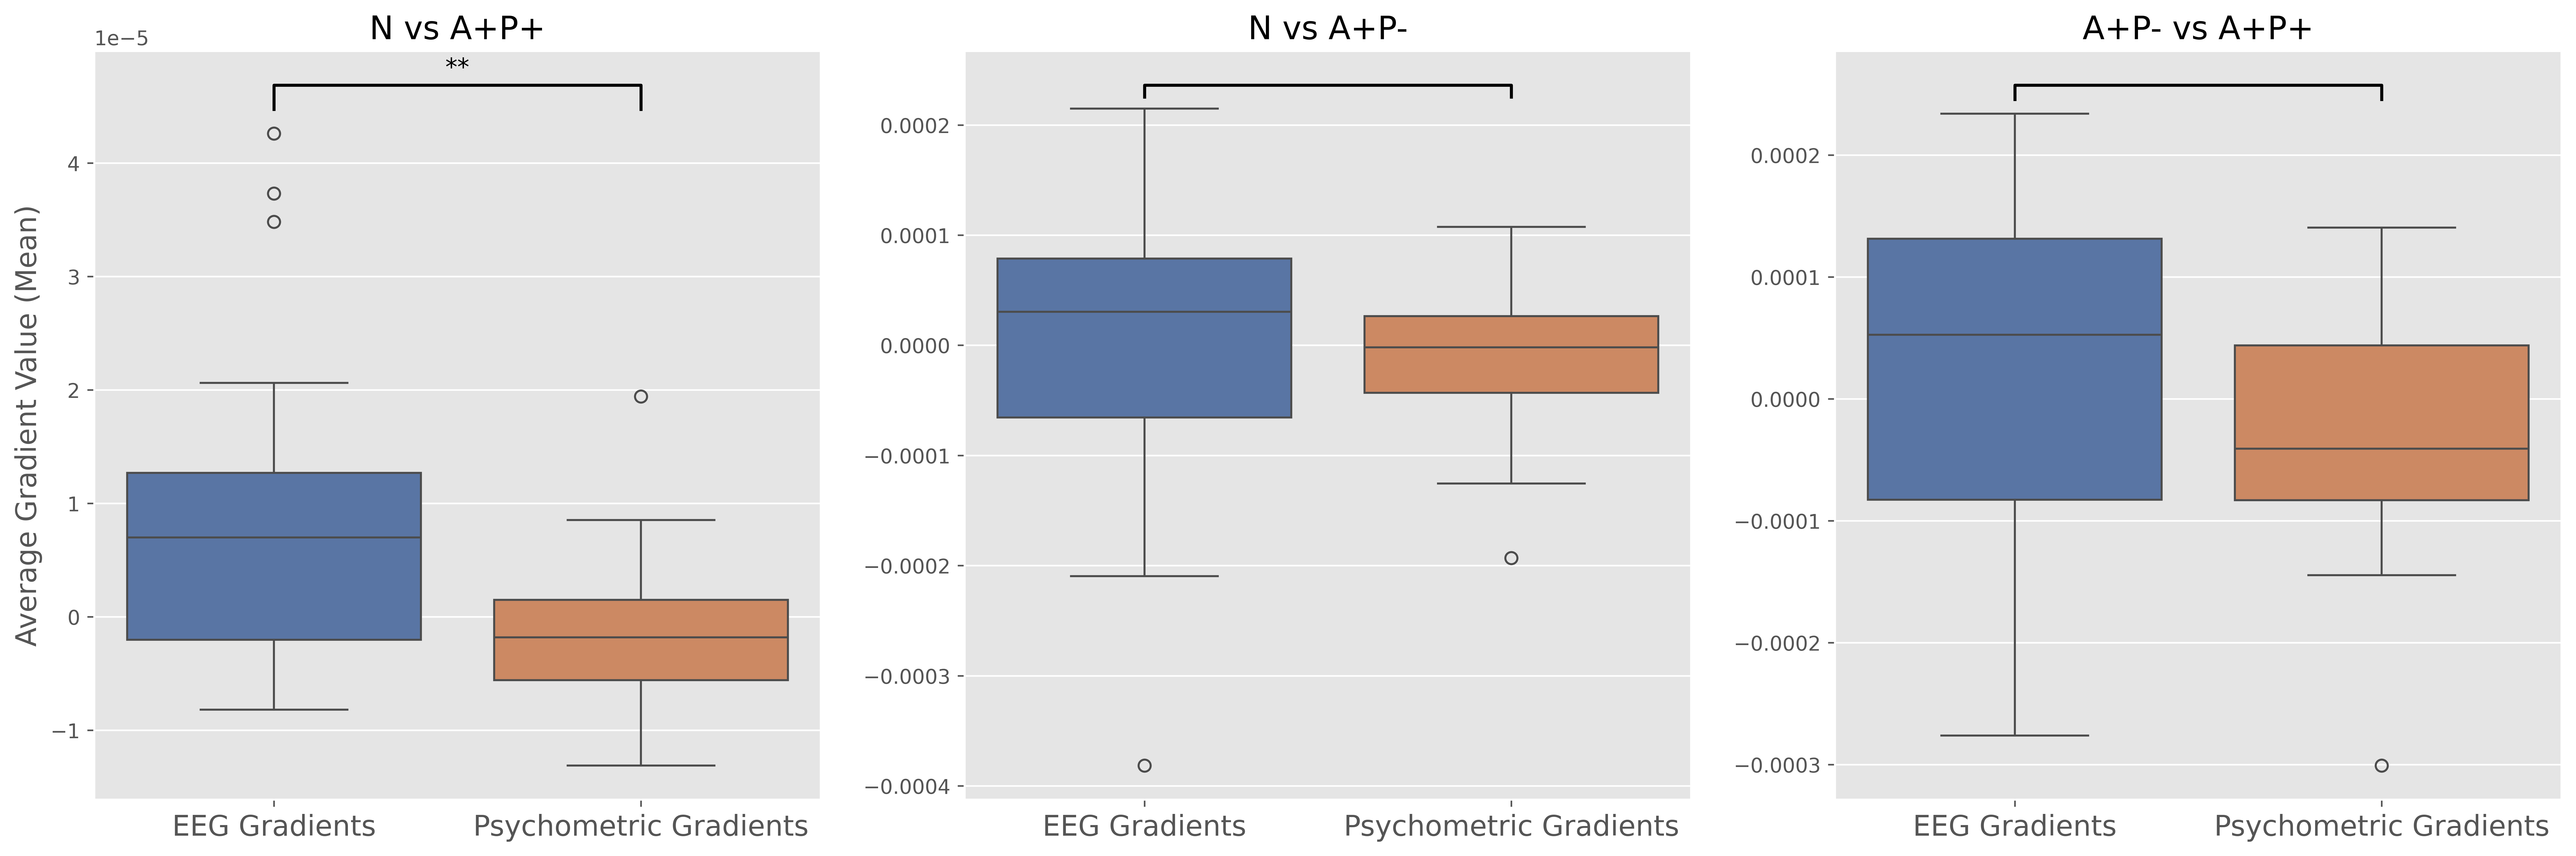

In [3]:
import os
import math
import re
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
plt.style.use('ggplot')

# Define a function to process a given NPZ file.
def process_npz(npz_path, n_channels, selected_bands, interested_columns):
    """
    Process an NPZ file containing grad_dict, sample_preds, and sample_labels.
    Returns a DataFrame with side gradient data including:
      - EEG Gradients (mean over columns 0-9)
      - Psychometric Gradients (mean over columns 10-48, updated by combining with MINI-COPE and CVLT composites)
    """
    data = np.load(npz_path, allow_pickle=True)
    grad_dict = data['avg_subject_gradients'].item()  # keys: subject identifiers, values: [9, 256, 13, 48]
    preds_array = data['sample_preds']   # shape: (n_subjects, 9)
    labels_array = data['sample_labels']   # shape: (n_subjects, 9)
    
    side_gradient_data = []  # store EEG vs. Psych contributions
    n_samples_per_subject = 9
    pred_idx = 0  # used to slice preds_array and labels_array
    
    grad_keys = list(grad_dict.keys())
    grad_values = list(grad_dict.values())
    
    for i, key in enumerate(grad_keys):
        # Each subject's gradient array is expected to be [9, 256, 13, 48]
        subject_np = grad_values[i]
        subject_grad_tensor = torch.tensor(subject_np, dtype=torch.float32)
        
        # Extract subject number from key (e.g., "sub-15" -> 15)
        match = re.search(r"\d+", key)
        subj_num = int(match.group()) if match else i + 1
        
        # Get predictions & labels for this subject
        chunk_preds = preds_array[pred_idx : pred_idx + n_samples_per_subject]
        chunk_labels = labels_array[pred_idx : pred_idx + n_samples_per_subject]
        print(f"Subject {subj_num} predictions: {chunk_labels}")  # Debug print
        pred_idx += n_samples_per_subject
        
        preds = torch.tensor(chunk_preds, dtype=torch.long)
        labels = torch.tensor(chunk_labels, dtype=torch.long)
        
        print(f"Processing subject {subj_num} (key={key}) with {n_samples_per_subject} samples:")
        print(f"  Gradient shape = {subject_grad_tensor.shape}, preds shape = {preds.shape}")
        
        # Majority vote check: require at least 5 correct predictions out of 9
        correct_mask = (preds == labels)
        if correct_mask.sum().item() < math.ceil(n_samples_per_subject / 2):
            print(f"Subject {subj_num} skipped due to insufficient correct predictions.")
            continue
        
        # Keep only the correctly predicted windows: shape [n_correct, 256, 13, 48]
        correct_grad_tensor = subject_grad_tensor[correct_mask]
        # Average over the window dimension -> [256, 13, 48]
        avg_grad = correct_grad_tensor.mean(dim=0)
        # Then average over the filter dimension (256) -> [13, 48]
        avg_grad = avg_grad.mean(dim=0)
        
        # Upsample from [13, 48] to sensor space: [n_channels, 48]
        heatmap = avg_grad.unsqueeze(0).unsqueeze(0)  # shape: [1, 1, 13, 48]
        # upsampled_heatmap = F.interpolate(
        #     heatmap,
        #     size=(n_channels, 48),
        #     mode="bilinear",
        #     align_corners=False
        # ).squeeze()  # shape: [n_channels, 48]
        print(f"Subject {subj_num} upsampled heatmap shape: {heatmap.shape}")
        upsampled_heatmap = heatmap.squeeze()  # dummy upsampled heatmap 
        # Compute EEG gradients: average over channels for first 10 columns.
        eeg_mean = upsampled_heatmap[:, :10].mean().item()
        
        # Compute overall psychometric gradient from columns 10-48.
        psych_vector = upsampled_heatmap[:, 10:48].mean(dim=0)  # shape: [38]
        psych_mean = psych_vector.mean().item()
        # Compute composite scores:
        # Assume in the 38 psychometric values, indices 0-13 correspond to MINI-COPE (14 values)
        # and indices 14-26 correspond to CVLT (13 values)
        mini_cope_mean = psych_vector[0:14].mean().item()
        cvlt_mean = psych_vector[14:27].mean().item()
        # Update the psychometric gradient by averaging the overall psych_mean with the two composites.
        updated_psych_mean = np.mean([psych_mean, mini_cope_mean, cvlt_mean])
        
        side_gradient_data.append({
            "subject_number": subj_num,
            "EEG Gradients": eeg_mean,
            "Psychometric Gradients": updated_psych_mean
        })
    
    # Convert side gradient data into a DataFrame.
    side_df = pd.DataFrame(side_gradient_data)
    return side_df

# Define parameters.
n_channels = 127  # adjust to your EEG sensor count
selected_bands = range(10)  # not used further in this snippet but required by function signature
interested_columns = [f"col{i}" for i in range(10, 48)]  # dummy names; not used here

# Define file paths for each classifier.
file1 = "./final_results_all/single_run_gradients_and_scores_0vs2.npz"  # N vs A+P+
file2 = "./final_results_all/single_run_gradients_and_scores_0vs1.npz"  # N vs A+P-
file3 = "./final_results_all/single_run_gradients_and_scores_1vs2.npz"  # A+P- vs A+P+

# Process each file.
side_df1 = process_npz(file1, n_channels, selected_bands, interested_columns)
side_df1["Classifier"] = "N vs A+P+"

side_df2 = process_npz(file2, n_channels, selected_bands, interested_columns)
side_df2["Classifier"] = "N vs A+P-"

side_df3 = process_npz(file3, n_channels, selected_bands, interested_columns)
side_df3["Classifier"] = "A+P- vs A+P+"

# Combine results from all classifiers.
combined_side_df = pd.concat([side_df1, side_df2, side_df3], ignore_index=True)
print("Combined Side Gradient DataFrame (first few rows):")
print(combined_side_df.head())

# Create subplots (one for each classifier) with independent y-axes.
unique_classifiers = combined_side_df["Classifier"].unique()
n_classifiers = len(unique_classifiers)

fig, axes = plt.subplots(1, n_classifiers, figsize=(6 * n_classifiers, 6), sharey=False, dpi=600)

for i, clf in enumerate(unique_classifiers):
    sub_df = combined_side_df[combined_side_df["Classifier"] == clf]
    # Melt the DataFrame so that 'EEG Gradients' and 'Psychometric Gradients' are in one column.
    melted_df = sub_df.melt(id_vars=["subject_number", "Classifier"],
                             value_vars=["EEG Gradients", "Psychometric Gradients"],
                             var_name="Measure",
                             value_name="Gradient")
    ax = axes[i] if n_classifiers > 1 else axes
    sns.boxplot(x="Measure", y="Gradient", data=melted_df,
                palette=["#4c72b0", "#dd8452"], ax=ax)
    ax.set_title(f"{clf}", fontsize=16)
    # ax.set_xlabel("Measure", fontsize=14)
    if i == 0:
        ax.set_ylabel("Average Gradient Value (Mean)", fontsize=14)
    else:
        ax.set_ylabel("")
    
    # Compute paired t-test between EEG and updated Psychometric gradients.
    t_stat, p_val = ttest_rel(sub_df["EEG Gradients"], sub_df["Psychometric Gradients"])
    
    # Correct p-value (although with one test, correction has little effect).
    _, corrected_p_val, _, _ = multipletests([p_val], alpha=0.05, method='fdr_bh')
    if corrected_p_val > 1:
         corrected_p_val = 1
    if corrected_p_val < 0.001:
         sig_text = '***'
    elif corrected_p_val < 0.01:
         sig_text = '**'
    elif corrected_p_val < 0.06:
         sig_text = '*'
    else:
         sig_text = ''
    
    y_max = melted_df["Gradient"].max()
    y_pos = y_max + 0.05 * y_max
    # Draw a horizontal significance line.
    ax.plot([0, 0, 1, 1], [y_pos, y_pos + 0.05*y_max, y_pos + 0.05*y_max, y_pos],
            lw=1.5, color='black')
    ax.text(0.5, y_pos + 0.06*y_max, sig_text, ha='center', va='bottom', fontsize=12, color='black')
    ax.tick_params(axis='x', labelsize=14)

# remove x labels measures
for ax in axes:
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the npz files for each classifier
data1 = np.load("single_run_gradients_and_scores_0vs2.npz", allow_pickle=True)  # N vs A+P+
data2 = np.load("single_run_gradients_and_scores_0vs1.npz", allow_pickle=True)  # N vs A+P-
data3 = np.load("single_run_gradients_and_scores_1vs2.npz", allow_pickle=True)  # A+P- vs A+P+

# Assume each npz file contains a key 'side_gradient_data'
# where side_gradient_data is a list of dictionaries with keys: "subject_number", "EEG", "Psych"
side_data1 = data1['side_gradient_data']
side_data2 = data2['side_gradient_data']
side_data3 = data3['side_gradient_data']

# Convert each side_gradient_data to a DataFrame and add a column indicating the classifier
side_df1 = pd.DataFrame(side_data1)
side_df1["Classifier"] = "N vs A+P+"

side_df2 = pd.DataFrame(side_data2)
side_df2["Classifier"] = "N vs A+P-"

side_df3 = pd.DataFrame(side_data3)
side_df3["Classifier"] = "A+P- vs A+P+"

# Combine all classifiers into a single DataFrame
combined_df = pd.concat([side_df1, side_df2, side_df3], ignore_index=True)

# Melt the DataFrame to have a column 'Measure' with values 'EEG' and 'Psych'
combined_melted = combined_df.melt(id_vars=["subject_number", "Classifier"],
                                   value_vars=["EEG", "Psych"],
                                   var_name="Measure",
                                   value_name="Gradient")

# Plot a grouped box plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Classifier", y="Gradient", hue="Measure",
                 data=combined_melted, palette=["#4c72b0", "#dd8452"])

ax.set_title("Comparison of EEG vs. Psychometric Gradient Contributions Across Classifiers")
plt.xlabel("Classifier")
plt.ylabel("Average Gradient Value")
plt.legend(title="Measure", loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
data = np.load("./final_results_all/single_run_gradients_and_scores_1vs2.npz", allow_pickle=True)
data.files

In [ ]:
# ['avg_subject_gradients',
#  'avg_subject_cnn_features',
#  'avg_subject_scores',
#  'sample_accuracy',
#  'sample_f1',
#  'sample_precision',
#  'sample_recall',
#  'sample_roc_auc',
#  'sample_confusion',
#  'subject_accuracy',
#  'subject_f1',
#  'subject_precision',
#  'subject_recall',
#  'subject_roc_auc',
#  'subject_confusion',
#  'per_subject_metrics',
#  'sample_preds',
#  'sample_labels']
sample_acc = data['sample_accuracy']
sample_preds = data["sample_f1"]
sample_precision = data["sample_precision"]
sample_recall = data["sample_recall"]
sample_roc_auc = data["sample_roc_auc"]


subject_acc = data["subject_accuracy"]
subject_f1 = data["subject_f1"]
subject_precision = data["subject_precision"]
subject_recall = data["subject_recall"]
# subject_roc_auc = data["subject_roc_auc"]


# print all

print(f"Sample Accuracy: {sample_acc}")
print(f"Sample F1: {sample_preds}")
print(f"Sample Precision: {sample_precision}")
print(f"Sample Recall: {sample_recall}")
print(f"Sample ROC AUC: {sample_roc_auc}")

print(f"Subject Accuracy: {subject_acc}")
print(f"Subject F1: {subject_f1}")
print(f"Subject Precision: {subject_precision}")
print(f"Subject Recall: {subject_recall}")
# print(f"Subject ROC AUC: {subject_roc_auc}")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler  # or StandardScaler, if desired

# --- Seaborn style settings ---
sns.set(style='white', context='talk', font_scale=1.2)  # Adjust as you prefer

# Load the data
data = np.load("./final_results_all/single_run_gradients_and_scores_0vs2_final_pool.npz", allow_pickle=True)

# --- Handle CNN Features Stored in a Dictionary ---
cnn_features_dict = data['avg_subject_cnn_features'].item()  # Convert 0-d array to dict

sample_ids = list(cnn_features_dict.keys())

# Stack the features into a single array (n_samples, n_features)
sample_cnn_features = np.vstack([cnn_features_dict[sid] for sid in sample_ids])
# sample_cnn_features = np.mean(sample_cnn_features, axis=1)  # optional averaging if needed

# --- Process Sample-level Predictions and Labels ---
sample_preds = data['sample_preds']
sample_labels = data['sample_labels']

n_samples = sample_cnn_features.shape[0]
assert sample_preds.size == n_samples, "Mismatch between features and predictions."
assert sample_labels.size == n_samples, "Mismatch between features and labels."

# --- Class Masks ---
class0 = (sample_labels == 0)
class1 = (sample_labels == 1)

# --- (Optional) Scale the features ---
# scaler = MinMaxScaler()
# sample_cnn_features = scaler.fit_transform(sample_cnn_features)

# --- Run TSNE ---
tsne = TSNE(n_components=2, random_state=50, perplexity=30, n_jobs = -1)

print(sample_cnn_features.shape)
theta_indicies = [1, 6] 

sample_cnn_features = sample_cnn_features[:, :, :, theta_indicies].mean(axis= 1).reshape(sample_cnn_features.shape[0], -1)
tsne_results = tsne.fit_transform(sample_cnn_features)

# --- Plot TSNE Results with Unfilled Markers ---
plt.figure(figsize=(8, 6))

plt.scatter(tsne_results[class0, 0],
            tsne_results[class0, 1],
            marker='o',            # Circle
            facecolors='none',     # Unfilled
            edgecolors='blue',     # Outline color
            s=80,                  # Marker size
            label='Class 0')

plt.scatter(tsne_results[class1, 0],
            tsne_results[class1, 1],
            marker='s',            # Square
            facecolors='none',     # Unfilled
            edgecolors='orange',   # Outline color
            s=80,
            label='Class 1')

plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.title("TSNE of Sample-Level CNN Features\n(Unfilled Circles vs. Squares)")
plt.legend()
sns.despine()  # remove top/right spines for a cleaner look
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler  # or StandardScaler
from functions import get_valid_subjects

# --- Seaborn style settings ---
data_directory = './HFD_PSD_stats_features_40sec'
valid_classes = {0, 2}
valid_subjects = get_valid_subjects(data_directory, selected_classes=valid_classes)
# valid_subjects should be ordered in the same way as sample_preds/sample_labels
sns.set_theme(style='whitegrid', context='paper', font_scale=1.1)

# Load the data
data = np.load("./final_results_all/single_run_gradients_and_scores_0vs2_final_pool.npz", allow_pickle=True)

# --- Handle CNN Features Stored in a Dictionary ---
cnn_features_dict = data['avg_subject_cnn_features'].item()  # Convert 0-d array to dict

# Filter the dictionary keys so that only valid subjects are included
# and the order matches the order of valid_subjects
filtered_sample_ids = [sub for sub in valid_subjects if sub in cnn_features_dict]

# Optional: Print to verify that the number of filtered subjects matches sample_preds/sample_labels
print("Number of valid subjects (filtered):", len(filtered_sample_ids))
print("Number of sample predictions:", data['sample_preds'].size)

# Stack the features in the order of valid subjects
sample_cnn_features = np.vstack([cnn_features_dict[sid] for sid in filtered_sample_ids])
numofsamples = sample_cnn_features.shape[0]
# sample_cnn_features = np.mean(sample_cnn_features, axis=1)  # optional averaging if needed
sample_cnn_features = sample_cnn_features[:,:,:,:10]
# sample_cnn_features = np.median(sample_cnn_features, axis=1)
print(sample_cnn_features.shape)
sample_cnn_features = sample_cnn_features.reshape(numofsamples, -1)
print("Feature array shape:", sample_cnn_features.shape)

# --- Process Sample-level Predictions and Labels ---
# It is assumed that sample_preds and sample_labels are stored in the same order as valid_subjects.
sample_preds = data['sample_preds']
sample_labels = data['sample_labels']

n_samples = sample_cnn_features.shape[0]
assert sample_preds.size == n_samples, "Mismatch between features and predictions."
assert sample_labels.size == n_samples, "Mismatch between features and labels."

# --- Class Masks ---
class0 = (sample_labels == 0)
class1 = (sample_labels == 1)

# --- (Optional) Scale the features ---
# Uncomment if you want to scale the features:
scaler = MinMaxScaler()
sample_cnn_features = scaler.fit_transform(sample_cnn_features)

# --- Run TSNE ---
tsne = TSNE(n_components=2, random_state=50, perplexity=30)
tsne_results = tsne.fit_transform(sample_cnn_features)

# --- Plot TSNE Results with Unfilled Markers ---
plt.figure(figsize=(8, 6))

# Class 0: Unfilled circles with blue edges
plt.scatter(tsne_results[class0, 0],
            tsne_results[class0, 1],
            marker='o',
            facecolors='none',
            edgecolors='blue',
            s=60,
            alpha=0.8,
            label='Class 0')

# Class 1: Unfilled squares with orange edges
plt.scatter(tsne_results[class1, 0],
            tsne_results[class1, 1],
            marker='s',
            facecolors='none',
            edgecolors='orange',
            s=60,
            alpha=0.8,
            label='Class 1')

plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.title("t-SNE of Sample-Level CNN Features", fontsize=14)
plt.legend(loc='best')
sns.despine()  # Remove top/right spines for a cleaner look

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler  # or StandardScaler
from functions import get_valid_subjects

# --- Seaborn style settings ---
data_directory = './HFD_PSD_stats_features_40sec'
valid_classes = {0, 2}
valid_subjects = get_valid_subjects(data_directory, selected_classes=valid_classes)
# valid_subjects should be ordered in the same way as sample_preds/sample_labels
sns.set_theme(style='whitegrid', context='paper', font_scale=1.1)

# Load the data
data = np.load("./final_results_all/single_run_gradients_and_scores_0vs2_final_pool.npz", allow_pickle=True)

# --- Handle CNN Features Stored in a Dictionary ---
cnn_features_dict = data['avg_subject_cnn_features'].item()  # Convert 0-d array to dict

# Filter the dictionary keys so that only valid subjects are included
# and the order matches the order of valid_subjects
filtered_sample_ids = [sub for sub in valid_subjects if sub in cnn_features_dict]

# Optional: Print to verify that the number of filtered subjects matches sample_preds/sample_labels
print("Number of valid subjects (filtered):", len(filtered_sample_ids))
print("Number of sample predictions:", data['sample_preds'].size)

# Stack the features in the order of valid subjects
sample_cnn_features = np.vstack([cnn_features_dict[sid] for sid in filtered_sample_ids])
numofsamples = sample_cnn_features.shape[0]
# sample_cnn_features = np.mean(sample_cnn_features, axis=1)  # optional averaging if needed
sample_cnn_features = sample_cnn_features[:,:,:,10:]
# sample_cnn_features = np.median(sample_cnn_features, axis=1)
print(sample_cnn_features.shape)
sample_cnn_features = sample_cnn_features.reshape(numofsamples, -1)
print("Feature array shape:", sample_cnn_features.shape)

# --- Process Sample-level Predictions and Labels ---
# It is assumed that sample_preds and sample_labels are stored in the same order as valid_subjects.
sample_preds = data['sample_preds']
sample_labels = data['sample_labels']

n_samples = sample_cnn_features.shape[0]
assert sample_preds.size == n_samples, "Mismatch between features and predictions."
assert sample_labels.size == n_samples, "Mismatch between features and labels."

# --- Class Masks ---
class0 = (sample_labels == 0)
class1 = (sample_labels == 1)

# --- (Optional) Scale the features ---
# Uncomment if you want to scale the features:
scaler = MinMaxScaler()
sample_cnn_features = scaler.fit_transform(sample_cnn_features)

# --- Run TSNE ---
tsne = TSNE(n_components=2, random_state=50, perplexity=30)
tsne_results = tsne.fit_transform(sample_cnn_features)

# --- Plot TSNE Results with Unfilled Markers ---
plt.figure(figsize=(8, 6))

# Class 0: Unfilled circles with blue edges
plt.scatter(tsne_results[class0, 0],
            tsne_results[class0, 1],
            marker='o',
            facecolors='none',
            edgecolors='blue',
            s=60,
            alpha=0.8,
            label='Class 0')

# Class 1: Unfilled squares with orange edges
plt.scatter(tsne_results[class1, 0],
            tsne_results[class1, 1],
            marker='s',
            facecolors='none',
            edgecolors='orange',
            s=60,
            alpha=0.8,
            label='Class 1')

plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.title("t-SNE of Sample-Level CNN Features", fontsize=14)
plt.legend(loc='best')
sns.despine()  # Remove top/right spines for a cleaner look

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler  # or StandardScaler
from functions import get_valid_subjects

# --- Seaborn style settings ---
data_directory = './HFD_PSD_stats_features_40sec'
valid_classes = {0, 2}
valid_subjects = get_valid_subjects(data_directory, selected_classes=valid_classes)
# valid_subjects should be ordered in the same way as sample_preds/sample_labels
sns.set_theme(style='whitegrid', context='paper', font_scale=1.1)

# Load the data
data = np.load("./final_results_all/single_run_gradients_and_scores_0vs2_final_pool.npz", allow_pickle=True)

# --- Handle CNN Features Stored in a Dictionary ---
cnn_features_dict = data['avg_subject_cnn_features'].item()  # Convert 0-d array to dict

# Filter the dictionary keys so that only valid subjects are included
# and the order matches the order of valid_subjects
filtered_sample_ids = [sub for sub in valid_subjects if sub in cnn_features_dict]

# Optional: Print to verify that the number of filtered subjects matches sample_preds/sample_labels
print("Number of valid subjects (filtered):", len(filtered_sample_ids))
print("Number of sample predictions:", data['sample_preds'].size)

# Stack the features in the order of valid subjects
sample_cnn_features = np.vstack([cnn_features_dict[sid] for sid in filtered_sample_ids])
numofsamples = sample_cnn_features.shape[0]
# sample_cnn_features = np.mean(sample_cnn_features, axis=1)  # optional averaging if needed
sample_cnn_features = sample_cnn_features[:,:,:,:]
# sample_cnn_features = np.median(sample_cnn_features, axis=1)
print(sample_cnn_features.shape)
sample_cnn_features = sample_cnn_features.reshape(numofsamples, -1)
print("Feature array shape:", sample_cnn_features.shape)

# --- Process Sample-level Predictions and Labels ---
# It is assumed that sample_preds and sample_labels are stored in the same order as valid_subjects.
sample_preds = data['sample_preds']
sample_labels = data['sample_labels']

n_samples = sample_cnn_features.shape[0]
assert sample_preds.size == n_samples, "Mismatch between features and predictions."
assert sample_labels.size == n_samples, "Mismatch between features and labels."

# --- Class Masks ---
class0 = (sample_labels == 0)
class1 = (sample_labels == 1)

# --- (Optional) Scale the features ---
# Uncomment if you want to scale the features:
scaler = MinMaxScaler()
sample_cnn_features = scaler.fit_transform(sample_cnn_features)

# --- Run TSNE ---
tsne = TSNE(n_components=2, random_state=50, perplexity=30)
tsne_results = tsne.fit_transform(sample_cnn_features)

# --- Plot TSNE Results with Unfilled Markers ---
plt.figure(figsize=(8, 6))

# Class 0: Unfilled circles with blue edges
plt.scatter(tsne_results[class0, 0],
            tsne_results[class0, 1],
            marker='o',
            facecolors='none',
            edgecolors='blue',
            s=60,
            alpha=0.8,
            label='Class 0')

# Class 1: Unfilled squares with orange edges
plt.scatter(tsne_results[class1, 0],
            tsne_results[class1, 1],
            marker='s',
            facecolors='none',
            edgecolors='orange',
            s=60,
            alpha=0.8,
            label='Class 1')



plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.title("t-SNE of Sample-Level CNN Features", fontsize=14)
plt.legend(loc='best')
sns.despine()  # Remove top/right spines for a cleaner look

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from functions import get_valid_subjects

# --- Seaborn style settings ---
data_directory = './HFD_PSD_stats_features_40sec'
valid_classes = {0, 2}
valid_subjects = get_valid_subjects(data_directory, selected_classes=valid_classes)
sns.set_theme(style='whitegrid', context='paper', font_scale=1.1)

# Load the data
data = np.load("./final_results_all/single_run_gradients_and_scores_0vs2_final_pool.npz", allow_pickle=True)
cnn_features_dict = data['avg_subject_cnn_features'].item()

# Filter the dictionary keys so that only valid subjects are included
filtered_sample_ids = [sub for sub in valid_subjects if sub in cnn_features_dict]
print("Number of valid subjects (filtered):", len(filtered_sample_ids))

# Stack features in the order of valid_subjects
sample_cnn_features = np.vstack([cnn_features_dict[sid] for sid in filtered_sample_ids])
numofsamples = sample_cnn_features.shape[0]
sample_cnn_features = sample_cnn_features.reshape(numofsamples, -1)
print("Feature array shape:", sample_cnn_features.shape)

# Process predictions & labels
sample_preds = data['sample_preds']
sample_labels = data['sample_labels']
assert sample_preds.size == numofsamples, "Mismatch between features and predictions."
assert sample_labels.size == numofsamples, "Mismatch between features and labels."

# Class masks
class0 = (sample_labels == 0)
class1 = (sample_labels == 1)

# (Optional) scale features
scaler = MinMaxScaler()
sample_cnn_features_scaled = scaler.fit_transform(sample_cnn_features)

# --- PCA before t-SNE ---
# Choose how many components to keep in PCA (e.g., 20)
n_pca_components = 30
pca = PCA(n_components=n_pca_components, random_state=50)
X_pca = pca.fit_transform(sample_cnn_features_scaled)

# --- t-SNE on the PCA outputs ---
tsne = TSNE(n_components=2, random_state=50, perplexity=50)
tsne_results = tsne.fit_transform(X_pca)

# --- Plot t-SNE Results ---
plt.figure(figsize=(8, 6))

plt.scatter(tsne_results[class0, 0],
            tsne_results[class0, 1],
            marker='o',
            facecolors='none',
            edgecolors='blue',
            s=60,
            alpha=0.8,
            label='Class 0')

plt.scatter(tsne_results[class1, 0],
            tsne_results[class1, 1],
            marker='s',
            facecolors='none',
            edgecolors='orange',
            s=60,
            alpha=0.8,
            label='Class 1')

plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.title("t-SNE of Sample-Level CNN Features (PCA → t-SNE)", fontsize=14)
plt.legend(loc='best')
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
import os
import math
import re
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import mne
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

###############################################################################
# 1) Load raw EEG data (to obtain sensor locations)
###############################################################################
raw_data = mne.io.read_raw_brainvision(
    "/home/s.dharia-ra/Shyamal/PEARL/sub-01/eeg/sub-01_task-rest_eeg.vhdr",
    preload=True
)
channels = raw_data.info['ch_names']  # e.g., 127 channels
n_channels = len(channels)
print(f"Found {n_channels} sensors.")

###############################################################################
# 2) Load participant info and filter by groups
###############################################################################
csv_data = pd.read_csv("filtered_participants.tsv", sep="\t")
filtered_groups = ['N', 'A+P-', 'A+P+']
csv_data = csv_data[csv_data['Group'].isin(filtered_groups)].copy()
group_mapping = {'N': 0, 'A+P-': 1, 'A+P+': 2}
csv_data['Genetic_Risk'] = csv_data['Group'].map(group_mapping)

def get_subject_number(pid):
    try:
        return int(pid.split('-')[1])
    except Exception:
        return None

csv_data['subject_number'] = csv_data['participant_id'].apply(get_subject_number)

# Optionally sample 50 per group if available
n_sample = 50
csv_data = csv_data.groupby('Group', group_keys=False).apply(
    lambda group: group.sample(n=n_sample, random_state=42) if len(group) >= n_sample else group
).reset_index(drop=True)

###############################################################################
# 3) Load NPZ file with gradients, predictions, and labels
###############################################################################
npz_data = np.load("./final_results_all/single_run_gradients_and_scores_0vs2_final_pool.npz", allow_pickle=True)
grad_dict = npz_data['avg_subject_cnn_features'].item()  # shape: [9, 256, 13, 48] per subject
# grad_dict = npz_data['avg_subject_gradients'].item()   # alternate for actual gradient data

preds_array = npz_data['sample_preds']   # shape: (n_subjects, 9)
labels_array = npz_data['sample_labels'] # shape: (n_subjects, 9)
print(f"Original grad_dict has {len(grad_dict)} entries.")

###############################################################################
# 4) Merge duplicates in grad_dict (if keys like "sub-01_run1" exist)
###############################################################################
sub_to_tensors = {}
for k, v in grad_dict.items():
    match = re.search(r"sub-\d+", k)
    real_sub_id = match.group() if match else k
    sub_to_tensors.setdefault(real_sub_id, []).append(v)

final_grad_dict = {}
for sub_id, arr_list in sub_to_tensors.items():
    stack_np = np.stack(arr_list, axis=0)  # shape: [N, 9, 256, 13, 48]
    merged_arr = np.mean(stack_np, axis=0) # shape: [9, 256, 13, 48]
    final_grad_dict[sub_id] = merged_arr

print(f"After merging duplicates, we have {len(final_grad_dict)} unique subjects in grad_dict.")
grad_dict = final_grad_dict

###############################################################################
# 5) Prepare band indices and define interested (global) columns
###############################################################################
selected_bands = range(10)  # indices 0 to 9 for topomap plotting
selected_bands_names = [
    "HFD delta", "HFD theta", "HFD alpha", "HFD beta", "HFD gamma",
    "PSD delta", "PSD theta", "PSD alpha", "PSD beta", "PSD gamma"
]
# Original list with individual measures (38 columns)
orig_interested_columns = [
    "BDI", "SES", "RPM", "EHI", "NEO_NEU", "NEO_EXT", "NEO_OPE", "NEO_AGR",
    "NEO_CON", "AUDIT", 
    "MINI-COPE_1", "MINI-COPE_2", "MINI-COPE_3", "MINI-COPE_4", "MINI-COPE_5", 
    "MINI-COPE_6", "MINI-COPE_7", "MINI-COPE_8", "MINI-COPE_9", "MINI-COPE_10", 
    "MINI-COPE_11", "MINI-COPE_12", "MINI-COPE_13", "MINI-COPE_14", 
    "CVLT_1", "CVLT_2", "CVLT_3", "CVLT_4", "CVLT_5", "CVLT_6", "CVLT_7", "CVLT_8", 
    "CVLT_9", "CVLT_10", "CVLT_11", "CVLT_12", "CVLT_13", 
    "dementia_history_parents"
]
# For correct family-wise testing, combine MINI-COPE and CVLT columns:
interested_columns = [
    "BDI", "SES", "RPM", "EHI", "NEO_NEU", "NEO_EXT", "NEO_OPE", "NEO_AGR",
    "NEO_CON", "AUDIT", "MINI-COPE", "CVLT", "dementia_history_parents"
]

###############################################################################
# 6) Process each subject’s gradients (using INCORRECTLY predicted windows only)
###############################################################################
subject_gradient_data = []
subject_global_data   = []
n_samples_per_subject = 9
pred_idx = 0

grad_keys = list(grad_dict.keys())
grad_values = list(grad_dict.values())

for i, key in enumerate(grad_keys):
    # shape: [9, 256, 13, 48]
    subject_np = grad_values[i]
    subject_grad_tensor = torch.tensor(subject_np, dtype=torch.float32)
    
    # Extract subject number from key (e.g., "sub-15")
    match = re.search(r"\d+", key)
    subj_num = int(match.group()) if match else i + 1

    # Get predictions & labels for this subject
    chunk_preds = preds_array[pred_idx : pred_idx + n_samples_per_subject]
    chunk_labels = labels_array[pred_idx : pred_idx + n_samples_per_subject]
    pred_idx += n_samples_per_subject

    preds = torch.tensor(chunk_preds, dtype=torch.long)
    labels = torch.tensor(chunk_labels, dtype=torch.long)

    print(f"Subject {subj_num} predictions/labels: {list(zip(preds.tolist(), labels.tolist()))}")
    print(f"Processing subject index {i+1} (key={key}, subject_number={subj_num}) with {n_samples_per_subject} samples:")
    print(f"  Gradient shape = {subject_grad_tensor.shape}, preds shape = {preds.shape}")

    # We now use the INCORRECTLY predicted windows:
    wrong_mask = (preds != labels)
    # We skip the subject if fewer than half the windows are incorrect
    if wrong_mask.sum().item() < math.ceil(n_samples_per_subject / 2):
        print(f"Subject {subj_num} skipped due to insufficient INCORRECT predictions.")
        continue

    # Keep only incorrectly predicted windows and average
    wrong_grad_tensor = subject_grad_tensor[wrong_mask]  # shape: [n_wrong, 256, 13, 48]
    avg_grad = wrong_grad_tensor.mean(dim=0)  # [256, 13, 48]
    avg_grad = avg_grad.mean(dim=0)           # [13, 48]

    # Upsample from [13, 48] to sensor space: [n_channels, 48]
    heatmap = avg_grad.unsqueeze(0).unsqueeze(0)  # shape: [1, 1, 13, 48]
    upsampled_heatmap = F.interpolate(
        heatmap,
        size=(n_channels, 48),
        mode="bilinear",
        align_corners=False
    ).squeeze()  # [n_channels, 48]

    # Record channel-level gradient values (first 10 columns) for topomap plotting
    for ch in range(n_channels):
        for band in selected_bands:
            subject_gradient_data.append({
                "subject_number": subj_num,
                "channel": ch,
                "freq_band": band,
                "gradient_value": upsampled_heatmap[ch, band].item()
            })

    # For global measures, average across channels -> [48]
    global_vector = upsampled_heatmap.mean(dim=0)
    if global_vector.shape[0] >= 48:
        # Use the values corresponding to the original interested columns
        global_values = global_vector[10:48]  # 38 values
        orig_data = {col: global_values[j].item() for j, col in enumerate(orig_interested_columns)}

        # Compute composite scores:
        mini_cope_cols = [col for col in orig_interested_columns if col.startswith("MINI-COPE")]
        cvlt_cols = [col for col in orig_interested_columns if col.startswith("CVLT")]
        mini_cope_mean = np.mean([orig_data[col] for col in mini_cope_cols])
        cvlt_mean = np.mean([orig_data[col] for col in cvlt_cols])
        composite_data = {
            "BDI": orig_data["BDI"],
            "SES": orig_data["SES"],
            "RPM": orig_data["RPM"],
            "EHI": orig_data["EHI"],
            "NEO_NEU": orig_data["NEO_NEU"],
            "NEO_EXT": orig_data["NEO_EXT"],
            "NEO_OPE": orig_data["NEO_OPE"],
            "NEO_AGR": orig_data["NEO_AGR"],
            "NEO_CON": orig_data["NEO_CON"],
            "AUDIT": orig_data["AUDIT"],
            "MINI-COPE": mini_cope_mean,
            "CVLT": cvlt_mean,
            "dementia_history_parents": orig_data["dementia_history_parents"]
        }
        subject_global_data.append({
            "subject_number": subj_num,
            **composite_data
        })

###############################################################################
# Convert aggregated results into DataFrames
###############################################################################
grad_df = pd.DataFrame(subject_gradient_data)
global_df = pd.DataFrame(subject_global_data)

###############################################################################
# 7) Merge with CSV data for group labels (by subject_number)
###############################################################################
merged_grad_df = pd.merge(
    grad_df,
    csv_data[['subject_number', 'Group']],
    on='subject_number',
    how='inner'
)
global_df = pd.merge(
    global_df,
    csv_data[['subject_number', 'Group']],
    on='subject_number',
    how='inner'
)

print("Merged Gradient DataFrame (first few rows):")
print(merged_grad_df.head())
print("Global Measures DataFrame (first few rows):")
print(global_df.head())

###############################################################################
# 8) Plot Raw Gradient Topomaps (for the first 10 columns) – INCORRECT windows
###############################################################################
plot_groups = ['N', 'A+P+']  # example groups of interest
n_plot_groups = len(plot_groups)
n_bands = len(selected_bands)
fig, axes = plt.subplots(nrows=n_plot_groups, ncols=n_bands, figsize=(4 * n_bands, 5 * n_plot_groups))
if n_plot_groups == 1:
    axes = np.expand_dims(axes, axis=0)

for row_idx, group in enumerate(plot_groups):
    for col_idx, band in enumerate(selected_bands):
        ax = axes[row_idx, col_idx]
        subset = merged_grad_df[(merged_grad_df['Group'] == group) & (merged_grad_df['freq_band'] == band)]
        if subset.empty:
            ax.set_title(f"No data: {group}-{selected_bands_names[band]}")
            continue
        # Average gradient over subjects (per channel)
        avg_grad = subset.groupby('channel')['gradient_value'].mean().values
        # do min-max scaling just for visualization
        min_val, max_val = avg_grad.min(), avg_grad.max()
        if (max_val - min_val) < 1e-9:
            # Avoid divide-by-zero if constant
            avg_grad[:] = 0.5
        else:
            avg_grad = (avg_grad - min_val) / (max_val - min_val)
        im, _ = mne.viz.plot_topomap(
            avg_grad, raw_data.info,
            sensors=False, names=None, show=False, size=10,
            cmap='viridis', axes=ax
        )
        ax.set_title(f"{group}\n{selected_bands_names[band]}", fontsize=20)
fig.suptitle("INCORRECT Window Topomaps of HFD and PSD features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.colorbar(im, ax=axes.ravel().tolist())
plt.show()

###############################################################################
# 9) Statistical Analysis on Channel-Level Gradients (t-tests with FDR_BH)
#    – INCORRECT windows
###############################################################################
pairs = [('N', 'A+P+')]
pairwise_grad_pvals = {pair: {} for pair in pairs}
for pair in pairs:
    for band in selected_bands:
        pairwise_grad_pvals[pair][band] = np.full(n_channels, np.nan)

epsilon = 1e-6
merged_grad_df['gradient_value_scaled'] = (
    merged_grad_df.groupby(['channel', 'freq_band'])['gradient_value']
    .transform(lambda x: (x - x.min()) / (x.max() - x.min() + epsilon))
)

for band in selected_bands:
    for ch in range(n_channels):
        subset = merged_grad_df[(merged_grad_df['channel'] == ch) & (merged_grad_df['freq_band'] == band)]
        for pair in pairs:
            group1_data = subset[subset['Group'] == pair[0]]['gradient_value_scaled']
            group2_data = subset[subset['Group'] == pair[1]]['gradient_value_scaled']
            if group1_data.empty or group2_data.empty:
                continue
            if group1_data.std() < 1e-6 and group2_data.std() < 1e-6:
                pairwise_grad_pvals[pair][band][ch] = 1.0
            else:
                _, p_val = ttest_ind(group1_data, group2_data, equal_var=False)
                pairwise_grad_pvals[pair][band][ch] = p_val

# FDR correction
for pair in pairs:
    for band in selected_bands:
        raw_pvals = pairwise_grad_pvals[pair][band]
        valid_mask = ~np.isnan(raw_pvals)
        if np.sum(valid_mask) > 0:
            _, pvals_corrected, _, _ = multipletests(raw_pvals[valid_mask], alpha=0.05, method='fdr_bh')
            raw_pvals[valid_mask] = pvals_corrected
            pairwise_grad_pvals[pair][band] = raw_pvals

# Plot channel-level corrected p-value topomaps
mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', markersize=6)
pvalues_masks = [0.001, 0.05]

# For fallback pairs (to visualize if no significance):
fallback_pairs = [(0,5), (1,6), (2,7), (3,8), (4,9)]

for pair in pairs:
    for mask_v in pvalues_masks:
        sig_bands = []
        for band in selected_bands:
            pvals_corrected = pairwise_grad_pvals[pair][band]
            if np.any(pvals_corrected < mask_v):
                sig_bands.append(band)
            import matplotlib.cm as cm
            cmap = cm.get_cmap('magma').copy()
            cmap.set_under('navy')  # Choose a color that suits your needs

        if sig_bands:
            print(f"Significant bands found for {pair}, p < {mask_v}: {sig_bands}")
            fig, axes = plt.subplots(
                1, 
                len(sig_bands), 
                figsize=(8 * 2, 12)
            )
            if len(sig_bands) == 1:
                axes = [axes]

            im = None
            for idx, band in enumerate(sig_bands):
                ax = axes[idx]
                pvals_corrected = pairwise_grad_pvals[pair][band]

                # Channels with p < threshold
                mask = pvals_corrected < mask_v
                pvals_transformed = -np.log10(pvals_corrected)

                im, _ = mne.viz.plot_topomap(
                    pvals_transformed,
                    raw_data.info,
                    sensors=True,
                    names=channels,
                    mask=mask,
                    mask_params=mask_params,
                    contours=6,
                    outlines='head',
                    cmap=cmap,
                    show=False,
                    size=20,
                    axes=ax,
                    vlim=(0.5, 1)  
                )
                ax.set_title(f"{selected_bands_names[band]}", fontsize=14)

                # Tweak channel label text
                for txt in ax.texts:
                    txt.set_fontsize(12)
                    x, y = txt.get_position()
                    txt.set_position((x, y + 0.005))
                    txt.set_zorder(10)

            fig.subplots_adjust(right=0.92)
            cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
            cbar = fig.colorbar(im, cax=cbar_ax)
            cbar.ax.set_title("-log10(p)", fontsize=10)

            plt.tight_layout(rect=[0, 0, 0.93, 1])
            plt.show()

        else:
            print(f"No significant difference for {pair} at p < {mask_v}.")
            print("Plotting HFD/PSD fallback pairs individually.\n")

            for (hfd_band, psd_band) in fallback_pairs:
                fig, axes = plt.subplots(1, 2, figsize=(16, 12))

                for idx, band in enumerate([hfd_band, psd_band]):
                    ax = axes[idx]
                    pvals_corrected = pairwise_grad_pvals[pair][band]

                    mask = pvals_corrected < mask_v
                    pvals_transformed = -np.log10(pvals_corrected)

                    im, _ = mne.viz.plot_topomap(
                        pvals_transformed,
                        raw_data.info,
                        sensors=True,
                        names=channels,
                        mask=mask,
                        mask_params=mask_params,
                        contours=6,
                        outlines='head',
                        cmap=cmap,
                        show=False,
                        size=20,
                        axes=ax,
                        vlim=(0.5, 1)
                    )
                    ax.set_title(f"{selected_bands_names[band]}", fontsize=14)

                    for txt in ax.texts:
                        txt.set_fontsize(12)
                        x, y = txt.get_position()
                        txt.set_position((x, y + 0.005))
                        txt.set_zorder(10)

                fig.subplots_adjust(right=0.92)
                cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
                



                cbar = fig.colorbar(im, cax=cbar_ax)
                cbar.ax.set_title("-log10(p)", fontsize=10)
                plt.tight_layout(rect=[0, 0, 0.93, 1])
                plt.show()

###############################################################################
# 10) Global Measures: Box Plots for Average Global Gradients (INCORRECT windows)
###############################################################################
plt.style.use('ggplot')
group_means = global_df.groupby('Group')[interested_columns].mean()
# We compare groups 'N' and 'A+P+'
group_means_subset = group_means.loc[['N', 'A+P+']]
all_measures = group_means_subset.columns 

# Perform t-tests for each measure and apply FDR_BH correction
raw_pvals_global = []
for measure in all_measures:
    data_N = global_df.loc[global_df['Group'] == 'N', measure]
    data_APplus = global_df.loc[global_df['Group'] == 'A+P+', measure]
    if len(data_N) < 2 or len(data_APplus) < 2:
        # If either group doesn't have enough data, skip
        raw_pvals_global.append(1.0)
        continue
    _, p_val = ttest_ind(data_N, data_APplus, equal_var=False)
    raw_pvals_global.append(p_val)

reject_global, pvals_corrected_global, _, _ = multipletests(raw_pvals_global, alpha=0.05, method='fdr_bh')

# Filter for only significant measures
sig_threshold = 0.05
significant_indices = [i for i, p in enumerate(pvals_corrected_global) if p < sig_threshold]

if len(significant_indices) == 0:
    print("No significant global measures found (p < 0.05 after FDR). No boxplots to display.")
else:
    significant_measures = [all_measures[i] for i in significant_indices]
    corrected_pvals_sig = [pvals_corrected_global[i] for i in significant_indices]
    n_measures = len(significant_measures)
    indices = np.arange(n_measures)
    offset = 0.2
    positions = []
    box_data = []

    for i, measure in enumerate(significant_measures):
        pos_N = i - offset
        pos_APplus = i + offset
        positions.extend([pos_N, pos_APplus])
        box_data.append(global_df.loc[global_df['Group'] == 'N', measure])
        box_data.append(global_df.loc[global_df['Group'] == 'A+P+', measure])

    fig, ax = plt.subplots(figsize=(12, 6))
    bp = ax.boxplot(box_data, positions=positions, widths=0.25, patch_artist=True)

    color_N = "#4c72b0"      # Example color
    color_APplus = "#dd8452" # Example color

    for j, box in enumerate(bp['boxes']):
        if j % 2 == 0:
            box.set_facecolor(color_N)
            box.set_edgecolor('black')
            box.set_alpha(0.8)
        else:
            box.set_facecolor(color_APplus)
            box.set_edgecolor('black')
            box.set_alpha(0.8)

    for whisker in bp['whiskers']:
        whisker.set(color='gray', linewidth=1.5)
    for cap in bp['caps']:
        cap.set(color='gray', linewidth=1.5)
    for median in bp['medians']:
        median.set(color='white', linewidth=1)

    ax.set_xticks(indices)
    ax.set_xticklabels(significant_measures, rotation=45, ha='right', fontsize=12)
    ax.set_ylabel('Global Gradient Value (Incorrect Windows)', fontsize=14)
    patch_N = mpatches.Patch(color=color_N, label='N')
    patch_APplus = mpatches.Patch(color=color_APplus, label='A+P+')
    ax.legend(handles=[patch_N, patch_APplus], loc='lower right', bbox_to_anchor=(1.05, 1), fontsize=12)

    # Annotate significance
    for i, measure in enumerate(significant_measures):
        data_N = global_df.loc[global_df['Group'] == 'N', measure]
        data_APplus = global_df.loc[global_df['Group'] == 'A+P+', measure]
        p_val = corrected_pvals_sig[i]
        if p_val < 0.001:
            sig_text = '***'
        elif p_val < 0.01:
            sig_text = '**'
        elif p_val < 0.05:
            sig_text = '*'
        else:
            sig_text = 'n.s.'
        
        y1 = data_N.max() if len(data_N) > 0 else 0
        y2 = data_APplus.max() if len(data_APplus) > 0 else 0
        y_max = max(y1, y2)
        line_offset = 0.05 * y_max
        text_offset = 0.02 * y_max
        x1 = indices[i] - offset
        x2 = indices[i] + offset
        y = y_max + line_offset
        ax.plot([x1, x1, x2, x2],
                [y, y + line_offset, y + line_offset, y],
                lw=1.5, color='black')
        ax.text((x1 + x2) / 2, y + line_offset + text_offset,
                sig_text, ha='center', va='bottom', color='black', fontsize=10)
    plt.tight_layout()
    plt.show()

###############################################################################
# 11) (Optional) Confusion Matrix Plots, etc.
#     (Omitted here; same logic as original code if needed)
###############################################################################
